In [6]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [23]:
y = [np.random.normal(0,1)]

nobs = 1000
for i in range(nobs):
    yt = y[-1] + np.random.normal(0,1)
    y.append(yt)
    
y = np.array(y)


#double check variance is right

def inform3(y,y1,y2):
    cov = np.cov( [y,y1,y2] )
    return (cov[0,2] - cov[1,2])**2/cov[2,2]/cov[0,0]


print(inform3(y[2:],y[1:-1],y[:-2]))
print(inform3(y[100:],y[:-100],y[1:-99]))



4.7661719929748706e-05
0.5185822144869262


In [29]:
i = 100
cov = np.cov( [y[i:],y[:-i],y[i-1:-1]] )


print(1 - (y[10:] - y[:-10]).var()/y[10:].var())
print(1 - (y[1:] - y[:-1]).var()/y[1:].var())
print('----')
print(cov[0,2]**2/cov[2,2]/cov[0,0])
print(cov[0,1]**2/cov[1,1]/cov[0,0])
print('----')
print(cov)
print(cov[0,2],cov[1,2],cov[2,2],cov[0,0])

0.8575076163307117
0.9871766883466493
----
0.9883541924257787
0.059315840169224726
----
[[84.38814555 20.1092768  83.99386438]
 [20.1092768  80.78686862 20.70188202]
 [83.99386438 20.70188202 84.58650353]]
83.99386438013819 20.70188201564472 84.58650352879164 84.3881455488669


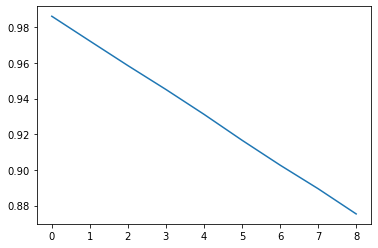

In [21]:
r2 = []

for i in range(1,10):
    r2.append(1 - (y[i:] - y[:-i]).var()/y[i:].var())
    
plt.plot(r2)

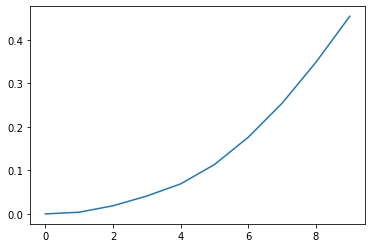

In [30]:
r2_3 = []


#how much extra info is in the yea behind
for i in range(1,100,10):
    r2_3.append(inform3(y[i:],y[:-i],y[i-1:-1]))
    
plt.plot(r2_3)


In [11]:
def inform3(y,y1,y2):
    cov = np.cov( [y,y1,y2] )
    print(cov)
    return (cov[0,2] - cov[1,2])**2/cov[2,2]/cov[0,0]


#denominator is biased upward... basically var(yt) = sigma*t... to that's not the right formula...
#the numerator also has a bias cov(yt,yt-s) = 

print(inform3(y[10:],y[:-10],y[9:-1]))


print('---')
print( (y[10:]*y[:-10]).mean() - y[10:].mean()*y[:-10].mean() )
print( (y[10:]*y[:-10]).mean() )
print('---')


print('---')
print( (y[1:]*y[:-1]).mean() - y[1:].mean()*y[:-1].mean() )
print( (y[1:]*y[:-1]).mean() )
print('---')


print(1 - (y[10:] - y[:-10]).var()/y[10:].var())
print(1 - (y[1:] - y[:-1]).var()/y[1:].var())

[[102.41826632  99.2959015  102.08030476]
 [ 99.2959015  105.83626083  99.91934423]
 [102.08030476  99.91934423 102.73880926]]
0.000443794302991909
---
99.19570382270473
493.5501847778538
---
---
104.42004551781201
496.3388507480859
---
0.9056542891258591
0.9904750695317687
